## Matrix multiplication from foundations

The *foundations* we'll assume throughout this course are:
- Python
- matplotlib
- The Python standard library
- Jupyter notebooks and nbdev

Once we implemented something correctly using only the above, we can then start using another library implementation.

In [21]:
from pathlib import Path
#import pickle, gzip, math, os, time, shutil, matplotlib as mpl, matplotlib.pyplot as plt

## Get data

In [22]:
MNIST_URL='https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true'
path_data = Path('data')
path_data.mkdir(exist_ok=True)
path_gz = path_data/'mnist.pkl.gz'

[urlretrieve](https://docs.python.org/3/library/urllib.request.html#urllib.request.urlretrieve) - (read the docs!)

In [23]:
from urllib.request import urlretrieve
if not path_gz.exists(): urlretrieve(MNIST_URL, path_gz)

In [24]:
ls -l data

total 33312
drwxr-xr-x  7 germangoldszmidt  staff       224 Dec 27 15:49 image_fashion_mnist/
-rw-r--r--  1 germangoldszmidt  staff  17051982 Oct 19 10:57 mnist.pkl.gz


This is a gzip file, Python has a gzip module so we can open a gzip file using `gzip.open()` 
and we can pass in the path, then say we're going to `rb`, read it as binary, —as opposed to text—.  
A Context Manager “with” clause is going to open up this gzip file, the  gzip object will be called “f” and then it runs  
everything inside the block and when it's done it  will close the file automatically. 
A “with” block can do different things.

In [25]:
import gzip, pickle
with gzip.open(path_gz, 'rb') as f: ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

The gzip file contains a pickle object, a Python object that has been saved to disk. 
It's the main way in pure Python to save stuff and it's part of the standard library. 
So this is how we load in from that file. 
The MNIST file contains a couple of tuples.
When we put a tuple on the left hand side of an equal sign it allows us to "destructure" it.
It puts the 1st tuple into `x_train` and `y_train`, and the second tuple into `x_valid` and `y_valid`. 

We are not allowed to use NumPy —according to our rules— 
but unfortunately this actually comes as NumPy, so we turned it into a list. 
This image is a 784 long list because they are 28 by 28 pixel images.

In [26]:
lst1 = list(x_train[0])
len(lst1)

784

To learn about a new data set, grab a little bit of it and look at it, and get a sense of what it is.
Lets look at a few examples of some values in that list.   
Looks like they're numbers between 0 and 1. 

In [27]:
vals = lst1[200:210]
vals

[0.0,
 0.0,
 0.0,
 0.19140625,
 0.9296875,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125]

In [28]:
some_dict = {'a': 1, 'b': 2, 'c': 3}
dict_iterator = iter(some_dict)
list(dict_iterator)

['a', 'b', 'c']

In [29]:
#Generators and iterators
def squares(n=10):
    print('Generating squares from 1 to {0}'.format(n ** 2))
    for i in range(1, n + 1):
        yield i ** 2

gen = squares()
for x in gen:
    print(x, end=' ')

Generating squares from 1 to 100
1 4 9 16 25 36 49 64 81 100 

The `yield` keyword in Python is similar to a return statement.
But the `yield` statement returns a generator object to the one who calls the function which contains yield, 
instead of simply returning a value.

How do we turn this 784 long list into 28 by 28? 
So I want a list of 28 lists of 28, because we don't have matrices.  

Lets define a function `chunks` to do it. Below is a use of it.

In [30]:
def chunks(x, sz):
    for i in range(0, len(x), sz): yield x[i:i+sz]

`vals` is currently a list of 10 things. 
`chunks(vals, 5)` creates two lists of 5. 
It's  "chunkifying" this list and 5 is the length of each chunk. 

In [31]:
list(chunks(vals, 5))

[[0.0, 0.0, 0.0, 0.19140625, 0.9296875],
 [0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125]]

Now we can take the full image number one, 
chunkify it into chunks of 28 long and turn it into a list, and plot it.

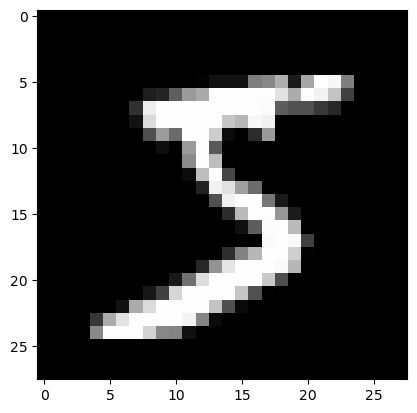

In [32]:
import matplotlib as mpl, matplotlib.pyplot as plt
mpl.rcParams['image.cmap'] = 'gray'
plt.imshow(list(chunks(lst1, 28)));

Python comes with a standard library “itertools” that makes it easier to work with iterators. 
Lets see one example which is “islice”.

[islice](https://docs.python.org/3/library/itertools.html#itertools.islice)

In [33]:
from itertools import islice  

So let's grab our 10 values.
We can take any list and turn it into an iterator by passing it to iter().
We can call `next(it)`, it's giving us each item, one at a time.
That's what converting it into an iterator does. 

In [34]:
it = iter(vals)
islice(it, 5)

`islice` converts `it` into a different kind of iterator, let's call this maybe islice iterator (`isit`).  
We create the iterator and then call next a few times.  
It's now only returning the first five,  before it raises `StopIteration`. 
`islice` grabs the first n things from an iterable (something that  you can iterate).   
We can pass it to list(), for example, if we pass it to list again this iterator 
has now grabbed the first five things,  so it's now up to thing number six.

In [35]:
list(islice(it, 5))

[0.0, 0.0, 0.0, 0.19140625, 0.9296875]

If we call it again it's the next five things, 

In [36]:
list(islice(it, 5))

[0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125]

and if we call it again, then there's nothing left.

In [37]:
list(islice(it, 5))

[]

Now lets do it with `islice`.
To `iter`  we can pass a list (to create an iterator) or we can pass it  a “callable”. 
A callable is something that we can put parentheses after, a function, a class, etc.
So we're going to pass it a function and, in the second form, 
it's going to be called until the function returns in this case is empty list. 

In [38]:
def f(): return list(islice(it, 28))
it = iter(vals)
islice(it, 5)

In [39]:
f()

[0.0,
 0.0,
 0.0,
 0.19140625,
 0.9296875,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125]

Now lets do the "chunks" with `islice`.
To `iter`  we can pass a list (to create an iterator) or we can pass it  a “callable”. 
A callable is something that we can put parentheses after, a function, a class, etc.
So we're going to pass it a function and, in the second form, 
it's going to be called until the function returns `[]`, empty list. 
And `islice` will return empty list when it's done.  

This is going to keep calling this function again and again, until it gets an empty list.  
So if we do it with 28 then we're going to get our image again. 

In [40]:
it = iter(lst1)
img = list(iter(lambda: list(islice(it, 28)), []))

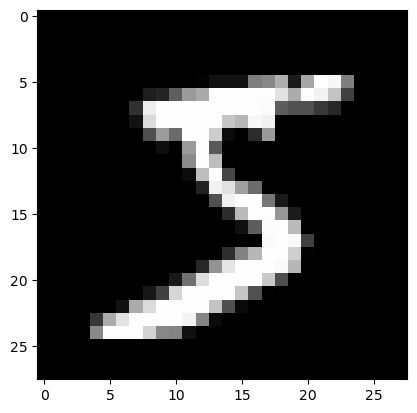

In [41]:
plt.imshow(img);

So we've now got two different  ways of creating exactly the same thing.  

### Playing with iterators

Now is a good time to play with iterators.
`lambda`s are as functions but we can define them in line.
Let's replace the above `lambda` with a function `f()` and experiment.  So let's create our iterator, `it`.

In [42]:
def f(): return(list(islice(it, 28)), [])
it= iter(lst1)

then call `f()` on it, and it returns the first 28. 
And  each time I do it I'm getting another 28.  

In [43]:
f()    # call multiple times to get many values.

([0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [])

## Matrix and tensor

In [45]:
len(img[20])

28

Now we've got an image, which is a list of lists, and each list is 28 long,  
we can index into it, so we can say image[20], is a list of 28 numbers and then we could index into that.  
Okay, so we can index into it, image[20][15]
We don't like to do M[i][j] for matrices, we would rather write it like M[i, j]
We have  to create our own class to make that work.  

In [32]:
img[20][15]

0.98828125

To create a class in Python, we write “class”  and then write the name of it. 
Then we need to write "dunder" methods, with names of two \__ underscores, a special word, and then two \__ underscores, e.g.`__init__`.
These Dunder methods are special methods which have particular meanings to Python,
all documented in the [Python data model](https://docs.python.org/3/reference/datamodel.html).

We want to be  able to call `img[20,15]`. 
As part of the data model, there is `__getitem__`.  
When we call square brackets on an object that's what Python uses. 
And it's going to  pass across the "[20,15]" here, that's indices.  
So we're now, basically, just going to return this, so the `self.xs`, with the first index and the second index.   

In [47]:
class Matrix:
    def __init__(self, xs): self.xs = xs
    def __getitem__(self, idxs): return self.xs[idxs[0]][idxs[1]]

So let's create that Matrix class and run that and you can now see "m[20,15]" is the same.  

In [48]:
%time
m = Matrix(img)
m[20,15]

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs


0.98828125

### Tensor
Now that we've created something  that lets us index into things, 
we're allowed to use this one feature in Pytorch.   
To create a  tensor, which is basically like our Matrix, we can now pass a list into `tensor()` 
to  get back a tensor version of that list.

In [50]:
import torch
from torch import tensor

Pytorch documentation some of it's good, some of it's not good.
So here's [tensor](https://pytorch.org/docs/stable/tensors.html). 
Tensors do just about everything for  numeric programming.  
It's worth scrolling through to get a sense of how we can construct it.
This is how we constructed one before, passing it list of lists. 
We can also pass it NumPy arrays, change types, etc.
Its worth browsing through it all to get a general sense.
Eventually we want to know about every single method,
or at least be aware of what  exists so we know what to search for in the docs.
Otherwise we end up recreating stuff from scratch, which is slower than reading the documentation to find out it's there.

In [51]:
tensor([1,2,3])

tensor([1, 2, 3])

More interestingly, we can pass in a list of lists, e.g. img.  

In [52]:
%time
tens = tensor(img)
tens[20,15]

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 6.91 µs


tensor(0.9883)

We've successfully reinvented that, so we can convert all of our lists into tensors. 
A convenient way is to use the `map` function in the Python standard library.  
`map` takes a function and some iterables, in this case one iterable, 
and it's going to apply this function to each of these four `x_ , y_` things and return those four things.
We can put four results on the left to receive those four outputs.
It is going to call `tensor(x_train)` and put it in `x_train`, ditto for `y_train`, etc.
This is converting all of these lists to tensors and storing them back in the same name.

In [53]:
x_train,y_train,x_valid,y_valid = map(tensor, (x_train,y_train,x_valid,y_valid))
x_train.shape

torch.Size([50000, 784])

`x_train` now is a tensor, so it has a `.shape` property: 
it has  50,000 images in it, which are each 784  long. 
We can find out what kind of stuff it contains by calling it  `.type()`, so it contains floats. 

In [54]:
x_train.type()

'torch.FloatTensor'

Instead of chunks, or  islice, the `reshape` method is roughly equivalent in a tensor.
To reshape our 50,000 by 784 tensor into 50,000 28 by 28 tensors, we write `reshape(50,000, 28, 28)`.  
`-1` means just fill this with all the rest, e.g., it can figure out that must be  50,000. 

In [40]:
imgs = x_train.reshape((-1,28,28))   #-1 means figure it out by yourself
imgs.shape

torch.Size([50000, 28, 28])

This is a batch of 50,000 28x28 images, is a rank-3 tensor in Pytorch. 
NumPy would call it an array with 3 dimensions.   
The rank is the number of dimensions. 
A particular image is a matrix, a 28 by 28 rank-2 tensor.  
A vector is a rank-1 tensor, a scalar is a rank-0 tensor.
Many languages/libraries don't do it that way, so a scalar is dependent on the language.

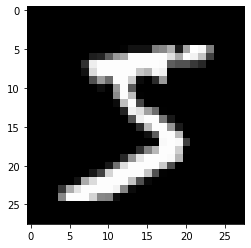

In [41]:
plt.imshow(imgs[0]);

We can index into the 0th image, 20th row, 15th column to get back this same number.  

In [42]:
imgs[0,20,15]

tensor(0.9883)

In [55]:
x_train.shape

torch.Size([50000, 784])

We can take `x_train.shape` and destructure it into `n`, number of images, `p`, the number of pixels. 

In [57]:
n,p = x_train.shape
n, p

(50000, 784)

`y_train` is going to be the labels, the digits.  Its shape indicates there are 50,000 labels.

In [44]:
y_train, y_train.shape

(tensor([5, 0, 4,  ..., 8, 4, 8]), torch.Size([50000]))

`min()` and `max()` are part of the library, so we can find out in y_train what's the smallest number,  
and what's the maximum number. 
So they go from 0  to 9, which are scalar tensors. 

In [45]:
min(y_train),max(y_train)

(tensor(0), tensor(9))

In [46]:
y_train.min(), y_train.max()

(tensor(0), tensor(9))

## Random numbers
We're allowed to use random numbers, because there is a random number generator in the python standard  library.
Still, we're going to do random numbers from scratch ourselves, because it's instructive.

A PRNG is a mathematical function that each time we call it returns it will return a number that "looks" random.  
An even distribution of random numbers and that there's no obvious correlation from one to the other.

To illustrate  going to run some code, calling the Python library's random().
We call random() 50 times and plot it.
For a random sequence, we expect that there's no obvious relationship between one  call and the next, 
the  numbers would look quite different to each other.  

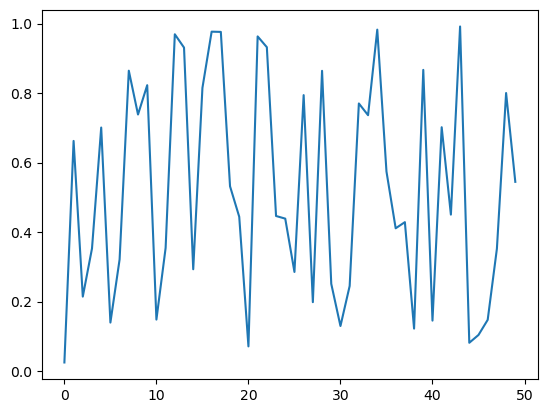

In [73]:
from random import random
plt.plot([random() for _ in range(50)]);

`random()` should return uniformly distributed random numbers.
If we call it lots of times and plot its histogram, we should see a fairly  evenly spread.

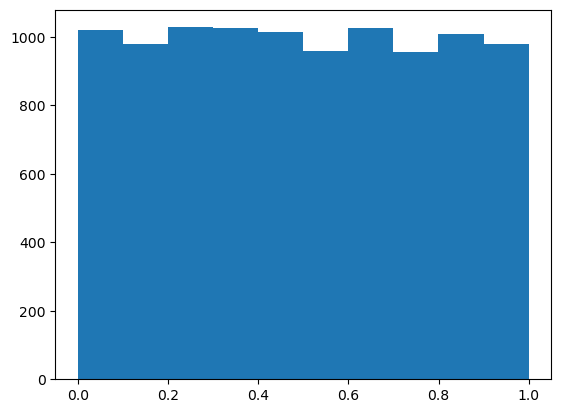

In [74]:
plt.hist([random() for _ in range(10000)]);

### Harware Random Number Generator

There is no way in pure software, to create a random number, we need a 
[Hardware random number generator](https://en.wikipedia.org/wiki/Hardware_random_number_generator).
The Australian National University quantum random number generator looks at the quantum fluctuations 
of a vacuum and provides an API which will return them.
That is one way to get random numbers.  
Cloudflare has a wall of "lava lamps" and uses the pixels of a camera looking at them to generate random numbers. 
See also [drand](https://pypi.org/project/drand/).

### Intel chip version
(Some?) Intel chips have rdrand](https://pypi.org/project/rdrand/), which will return random numbers.

In [70]:
import rdrand
from rdrand import RdRandom, RdSeedom
r = RdRandom()
rs = RdSeedom()
r.getrandbytes(10), r.randint(1,10)

(b'\x01D\xc6\x9b\xb4\x14w\xb0!s', 8)

### Quantumrandom
[quantumrandom](https://pypi.org/project/quantumrandom/)
Provides tools for interacting with [The ANU Quantum Random Number Generator](qrng.anu.edu.au). 
It communicates with their JSON API and provides a qrandom command-line tool, a Python API, and a Linux /dev/qrandom character device.
    

In [71]:
import quantumrandom

In [72]:
q = quantumrandom.get_data(array_length=3)
s = q[0]*q[1]*q[2]
s

7262458879500

These remote services can be  slow, so they can get us one random number from time to time. 
But we want a way of getting lots of random numbers, so we use a 
[Pseudorandom number generator, PRNG](https://en.wikipedia.org/wiki/Pseudorandom_number_generator),
a mathematical function that each time we call it returns a number that "looks" random. 

### Reimplementing Python pseudo-random Random

There is a random in the standard library, but it is instructive to build it from scratch.<br>
Based on the [Wichmann Hill algorithm](https://en.wikipedia.org/wiki/Wichmann–Hill) that was used before Python 2.3.

We're going to create `rand()` a function that has the above properties. 
Random state `rnd_state` is a global variable of one or more numbers. 
We start with no random state at all, and define a function `seed()` that we're going to pass something to. 
We can just mash the keyboard to create this number, or get it
from a hardware generator ANU , Cloudflare, RDRAND, etc., or the current tick count in nanoseconds.
In Python we often use the number 42.
There's various  ways of getting some random starting point.  
When we pass it into `seed()`, it's going to do a bunch of modular divisions, 
create a tuple of three things, and store them in this global state, `rnd_state`.

In [77]:
rnd_state = None
def seed(a):
    global rnd_state
    a, x = divmod(a, 30268)
    a, y = divmod(a, 30306)
    a, z = divmod(a, 30322)
    rnd_state = int(x)+1, int(y)+1, int(z)+1

In [78]:
seed(s)
rnd_state

(28553, 5910, 7918)

In [79]:
def rand():
    global rnd_state
    x, y, z = rnd_state
    x = (171 * x) % 30269
    y = (172 * y) % 30307
    z = (170 * z) % 30323
    rnd_state = x,y,z
    return (x/30269 + y/30307 + z/30323) % 1.0

`rand()` returns (pseudo) random numbers. We pull out the random state at the start,  we do some math ops to it, 
and then we store new random state.  
Each time we call it we get a different number, so this is a random number generator.
Is important to remember that random number generators rely on this state.

In [80]:
rand(),rand(),rand()

(0.23721800040726726, 0.7143177180466813, 0.7366023339266565)

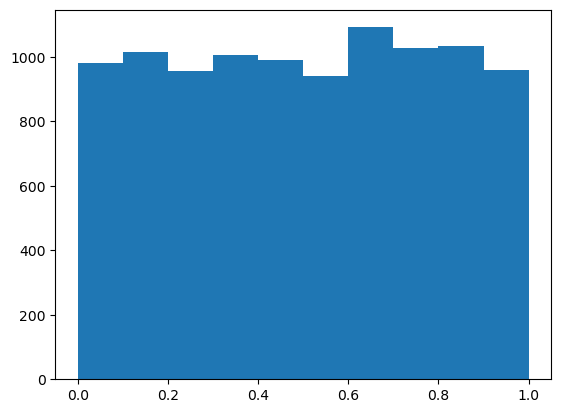

In [87]:
plt.hist([rand() for _ in range(10000)]);

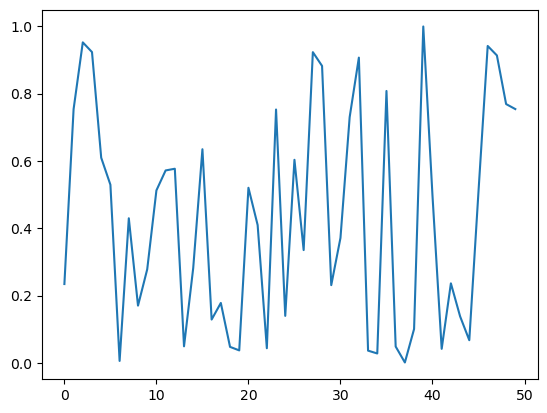

In [86]:
plt.plot([rand() for _ in range(50)]);

### Problem with initialization in Pytorch and Numpy

`os.fork()` creates a whole separate copy of this Python process. 
In one copy, the parent, `os.fork()` returns True, and on the other copy, the child, it returns `False`.
In each copy we call `rand()`, and expect to get 2 different random numbers. 
But they are the same number, because the processes are copies of each other,
and therefore, they each contain the same numbers in random state.  
In Deep Learning we often do parallel processing, for example,  to generate lots of augmented images at the same time,
using multiple processes.  
fastai used to have a bug where we failed to correctly initialize the random number generator separately, in each process.  

In [81]:
import os

In [82]:
if os.fork(): print(f'In parent: {rand()}')
else:
    print(f'In child: {rand()}')
    os._exit(os.EX_OK)

In parent: 0.9888911657449224
In child: 0.9888911657449224


As of (Oct 2022), `torch.rand()` fails to initialize the random number generator. 

Pytorch does not re-initialize the random stream on the different processes :(

In [83]:
if os.fork(): print(f'In parent: {torch.rand(1)}')
else:
    print(f'In child: {torch.rand(1)}')
    os._exit(os.EX_OK)

In parent: tensor([0.1298])
In child: tensor([0.1298])


Numpy does not re-initialize the random stream  :(

In [84]:
import numpy as np
if os.fork(): print(f'In parent: {np.random.rand(1)}')
else:
    print(f'In child: {np.random.rand(1)}')
    os._exit(os.EX_OK)

In parent: [0.02448662]
In child: [0.02448662]


Python correctly re-initializes the random stream!

In [85]:
from random import random
if os.fork(): print(f'In parent: {random()}')
else:
    print(f'In child: {random()}')
    os._exit(os.EX_OK)

In parent: 0.455817482054759
In child: 0.04254715043118773


#### Timeit
`%timeit` is a special IPython function that runs a piece of Python code this many times. 
It will do 7 runs and it'll take the mean and  standard deviation. 
Below we generate  random numbers, 7,840 times and put them into 10  
long chunks, and if I run that, it takes 4 milliseconds per loop. 

In [88]:
%timeit -n 10 list(chunks([rand() for _ in range(7840)], 10))

4.65 ms ± 636 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Pytorch version is much faster!

In [89]:
%timeit -n 10 torch.randn(784,10)

The slowest run took 11.57 times longer than the fastest. This could mean that an intermediate result is being cached.
186 µs ± 211 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Matrix multiplication

This is how we can create a 784 by 10 Matrix. In the final layer of our neuralnet, 
where if we're doing a linear classifier, our linear weights need to be  784 by 10,
because that's the number of possible  outputs, the number of possible digits.

In [65]:
weights = torch.randn(784,10)
bias = torch.zeros(10)
weights, bias

(tensor([[ 1.2558,  0.0405, -0.9415,  ..., -1.2427, -1.3375, -0.1807],
         [ 0.7572, -0.2892, -0.5375,  ...,  0.5311,  0.4334,  3.0310],
         [ 0.0634,  0.8381,  0.0244,  ...,  0.5444, -1.2396, -0.5150],
         ...,
         [-0.4513,  0.6225,  1.4008,  ...,  0.4049, -0.8122,  1.3418],
         [ 1.2788,  0.9462, -0.0707,  ...,  1.1637, -0.9635,  1.8939],
         [ 0.8238,  0.4303, -0.9915,  ...,  0.5846,  0.3517,  1.9756]]),
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [66]:
m1 = x_valid[:5]
m2 = weights

In [67]:
m1.shape,m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [68]:
ar,ac = m1.shape # n_rows * n_cols
br,bc = m2.shape
(ar,ac),(br,bc)

((5, 784), (784, 10))

In [69]:
t1 = torch.zeros(ar, bc)
t1.shape

torch.Size([5, 10])

In [70]:
%time
for i in range(ar):         # 5
    for j in range(bc):     # 10
        for k in range(ac): # 784
            t1[i,j] += m1[i,k] * m2[k,j]

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


In [71]:
t1

tensor([[  0.3450,   3.1568,  -8.2439,  14.7714,  -8.9086, -10.4124,   8.5572,
         -20.3992,  13.0325,  -2.0119],
        [  5.0096, -15.7940,   9.6169,   9.7840,  10.2704,   1.3079,  -0.3804,
          -7.6346,  13.1184,  -6.8433],
        [-22.1025,  -2.5429,   1.3293,  -1.5239,   1.0274, -10.2624,   5.6658,
          -5.0607,  14.2746, -15.4418],
        [ -2.3959,   1.1629,  -6.7106,   0.7789,  -6.8013,   1.7198,   6.3227,
          -5.3550,   6.8599,  -5.7420],
        [ -3.7059,  -0.2894,   9.2068,  16.5096,   3.9656,  -4.9080,   7.4172,
           1.5515,  18.2224, -10.1126]])

In [79]:
t1.shape, type(t1)

(torch.Size([5, 10]), torch.Tensor)

In [78]:
s1 = m1 @ m2
s1.shape, type(s1)

(torch.Size([5, 10]), torch.Tensor)

In [83]:
s1[0], t1[0]

(tensor([  0.3450,   3.1568,  -8.2439,  14.7714,  -8.9086, -10.4124,   8.5572,
         -20.3992,  13.0325,  -2.0119]),
 tensor([  0.3450,   3.1568,  -8.2439,  14.7714,  -8.9086, -10.4124,   8.5572,
         -20.3992,  13.0325,  -2.0119]))

In [84]:
import numpy as np
torch.set_printoptions(precision=2, linewidth=140, sci_mode=False)   # make it easier to read
np.set_printoptions(precision=2, linewidth=140)
t1

tensor([[  0.34,   3.16,  -8.24,  14.77,  -8.91, -10.41,   8.56, -20.40,  13.03,  -2.01],
        [  5.01, -15.79,   9.62,   9.78,  10.27,   1.31,  -0.38,  -7.63,  13.12,  -6.84],
        [-22.10,  -2.54,   1.33,  -1.52,   1.03, -10.26,   5.67,  -5.06,  14.27, -15.44],
        [ -2.40,   1.16,  -6.71,   0.78,  -6.80,   1.72,   6.32,  -5.36,   6.86,  -5.74],
        [ -3.71,  -0.29,   9.21,  16.51,   3.97,  -4.91,   7.42,   1.55,  18.22, -10.11]])

In [111]:
def matmul(a,b):
    (ar,ac),(br,bc) = a.shape,b.shape
    assert(ac==br)
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac): c[i,j] += a[i,k] * b[k,j]
    return c

In [157]:
ar*ac*bc # Total number of multiplications... how long it took?

39200

In [158]:
%time _=matmul(m1, m2) # half a second

CPU times: user 1.79 ms, sys: 16.1 ms, total: 17.9 ms
Wall time: 58.1 ms


## Numba

In [114]:
from numba import njit

In [115]:
@njit
def dot(a,b):
    res = 0.
    for i in range(len(a)): res+=a[i]*b[i]
    return res

In [116]:
from numpy import array

In [117]:
%time dot(array([1.,2,3]),array([2.,3,4]))

CPU times: user 83 ms, sys: 150 ms, total: 233 ms
Wall time: 551 ms


20.0

In [118]:
%time dot(array([1.,2,3]),array([2.,3,4]))

CPU times: user 22 µs, sys: 5 µs, total: 27 µs
Wall time: 31.2 µs


20.0

Now only two of our loops are running in Python, not three:

In [119]:
def matmul(a,b):
    (ar,ac),(br,bc) = a.shape,b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc): c[i,j] = dot(a[i,:], b[:,j])
    return c

In [120]:
m1a,m2a = m1.numpy(),m2.numpy()

In [121]:
from fastcore.test import *

In [122]:
test_close(t1,matmul(m1a, m2a))

In [123]:
%timeit -n 10 matmul(m1a,m2a)

400 µs ± 64.2 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Elementwise ops

[TryAPL](https://tryapl.org/)

In [124]:
a = tensor([10., 6, -4])
b = tensor([2., 8, 7])
a,b

(tensor([10.,  6., -4.]), tensor([2., 8., 7.]))

In [125]:
a + b

tensor([12., 14.,  3.])

In [126]:
(a < b).float().mean()

tensor(0.67)

In [128]:
m = tensor([[1., 2, 3], [4,5,6], [7,8,9]]); m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

Frobenius norm:

$$\| A \|_F = \left( \sum_{i,j=1}^n | a_{ij} |^2 \right)^{1/2}$$

*Hint*: you don't normally need to write equations in LaTeX yourself, instead, you can click 'edit' in Wikipedia and copy the LaTeX from there (which is what I did for the above equation). Or on arxiv.org, click "Download: Other formats" in the top right, then "Download source"; rename the downloaded file to end in `.tgz` if it doesn't already, and you should find the source there, including the equations to copy and paste. This is the source LaTeX that I pasted to render the equation above:

```latex
$$\| A \|_F = \left( \sum_{i,j=1}^n | a_{ij} |^2 \right)^{1/2}$$
```

In [129]:
(m*m).sum().sqrt()   #Frobenius norm of m

tensor(16.88)

In [130]:
def matmul(a,b):
    (ar,ac),(br,bc) = a.shape,b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc): c[i,j] = (a[i,:] * b[:,j]).sum()
    return c

In [131]:
test_close(t1,matmul(m1, m2))

In [132]:
%timeit -n 10 _=matmul(m1, m2)

856 µs ± 108 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [133]:
def matmul(a,b):
    (ar,ac),(br,bc) = a.shape,b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc): c[i,j] = torch.dot(a[i,:], b[:,j])
    return c

In [134]:
test_close(t1,matmul(m1, m2))

In [135]:
%timeit -n 10 _=matmul(m1, m2)

706 µs ± 54.3 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Broadcasting

The term **broadcasting** describes how arrays with different shapes are treated during arithmetic operations.  The term broadcasting was first used by Numpy.

From the [Numpy Documentation](https://docs.scipy.org/doc/numpy-1.10.0/user/basics.broadcasting.html):

    The term broadcasting describes how numpy treats arrays with 
    different shapes during arithmetic operations. Subject to certain 
    constraints, the smaller array is “broadcast” across the larger 
    array so that they have compatible shapes. Broadcasting provides a 
    means of vectorizing array operations so that looping occurs in C
    instead of Python. It does this without making needless copies of 
    data and usually leads to efficient algorithm implementations.
    
In addition to the efficiency of broadcasting, it allows developers to write less code, which typically leads to fewer errors.

*This section was adapted from [Chapter 4](http://nbviewer.jupyter.org/github/fastai/numerical-linear-algebra/blob/master/nbs/4.%20Compressed%20Sensing%20of%20CT%20Scans%20with%20Robust%20Regression.ipynb#4.-Compressed-Sensing-of-CT-Scans-with-Robust-Regression) of the fast.ai [Computational Linear Algebra](https://github.com/fastai/numerical-linear-algebra) course.*

### Broadcasting with a scalar

In [136]:
a

tensor([10.,  6., -4.])

In [137]:
a > 0

tensor([ True,  True, False])

How are we able to do `a > 0`?  0 is being **broadcast** to have the same dimensions as a.

For instance you can normalize our dataset by subtracting the mean (a scalar) from the entire data set (a matrix) and dividing by the standard deviation (another scalar), using broadcasting.

Other examples of broadcasting with a scalar:

In [138]:
a + 1

tensor([11.,  7., -3.])

In [139]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [140]:
2*m

tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.],
        [14., 16., 18.]])

### Broadcasting a vector to a matrix

Although broadcasting a scalar is an idea that dates back to APL, the more powerful idea of broadcasting across higher rank tensors [comes from](https://mail.python.org/pipermail/matrix-sig/1995-November/000143.html) a little known language called [Yorick](https://software.llnl.gov/yorick-doc/manual/yorick_50.html).

We can also broadcast a vector to a matrix:

In [141]:
c = tensor([10.,20,30]); c

tensor([10., 20., 30.])

In [142]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [143]:
m.shape,c.shape

(torch.Size([3, 3]), torch.Size([3]))

In [144]:
m + c

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [145]:
c + m

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

We don't really copy the rows, but it looks as if we did. In fact, the rows are given a *stride* of 0.

In [146]:
t = c.expand_as(m)

In [147]:
t

tensor([[10., 20., 30.],
        [10., 20., 30.],
        [10., 20., 30.]])

In [148]:
m + t

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [149]:
t.storage()

 10.0
 20.0
 30.0
[torch.FloatStorage of size 3]

In [150]:
t.stride(), t.shape

((0, 1), torch.Size([3, 3]))

You can index with the special value [None] or use `unsqueeze()` to convert a 1-dimensional array into a 2-dimensional array (although one of those dimensions has value 1).

In [151]:
c.unsqueeze(0), c[None, :]

(tensor([[10., 20., 30.]]), tensor([[10., 20., 30.]]))

In [152]:
c.shape, c.unsqueeze(0).shape

(torch.Size([3]), torch.Size([1, 3]))

In [153]:
c.unsqueeze(1), c[:, None]

(tensor([[10.],
         [20.],
         [30.]]),
 tensor([[10.],
         [20.],
         [30.]]))

In [154]:
c.shape, c.unsqueeze(1).shape

(torch.Size([3]), torch.Size([3, 1]))

You can always skip trailling ':'s. And '...' means '*all preceding dimensions*'

In [155]:
c[None].shape,c[...,None].shape

(torch.Size([1, 3]), torch.Size([3, 1]))

In [ ]:
c[:,None].expand_as(m)

In [ ]:
m + c[:,None]

In [ ]:
m + c[None,:]

### Broadcasting Rules

In [ ]:
c[None,:]

In [ ]:
c[None,:].shape

In [ ]:
c[:,None]

In [ ]:
c[:,None].shape

In [ ]:
c[None,:] * c[:,None]

In [ ]:
c[None] > c[:,None]

When operating on two arrays/tensors, Numpy/PyTorch compares their shapes element-wise. It starts with the **trailing dimensions**, and works its way forward. Two dimensions are **compatible** when

- they are equal, or
- one of them is 1, in which case that dimension is broadcasted to make it the same size

Arrays do not need to have the same number of dimensions. For example, if you have a `256*256*3` array of RGB values, and you want to scale each color in the image by a different value, you can multiply the image by a one-dimensional array with 3 values. Lining up the sizes of the trailing axes of these arrays according to the broadcast rules, shows that they are compatible:

    Image  (3d array): 256 x 256 x 3
    Scale  (1d array):             3
    Result (3d array): 256 x 256 x 3

The [numpy documentation](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html#general-broadcasting-rules) includes several examples of what dimensions can and can not be broadcast together.

## Matmul with broadcasting

In [159]:
digit = m1[0]
digit.shape,m2.shape

(torch.Size([784]), torch.Size([784, 10]))

In [160]:
digit[:,None].shape

torch.Size([784, 1])

In [161]:
digit[:,None].expand_as(m2).shape

torch.Size([784, 10])

In [167]:
(digit[:,None]*m2).shape

torch.Size([784, 10])

In [168]:
def matmul(a,b):
    (ar,ac),(br,bc) = a.shape,b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
#       c[i,j] = (a[i,:] * b[:,j]).sum()      # previous version
        c[i]   = (a[i,:,None] * b).sum(dim=0) # broadcast version
    return c

In [169]:
test_close(t1,matmul(m1, m2))

In [170]:
%timeit -n 10 _=matmul(m1, m2)

160 µs ± 103 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Our time has gone from ~500ms to <0.1ms, an over 5000x improvement! We can run on the whole dataset now.

In [171]:
tr = matmul(x_train, weights)
tr

tensor([[ -8.90,  11.26,   0.97,  ..., -18.49,  16.63, -14.59],
        [ -8.50,  10.43,  -9.71,  ...,  -2.85,  17.78,  -2.93],
        [  1.60,   4.26,   3.54,  ...,   3.26,   1.52,   2.44],
        ...,
        [  2.11,   1.47,  -0.25,  ...,  -9.60,  15.59,  -4.15],
        [  2.42,   1.42,  -8.62,  ...,  -6.06,   8.63,  -4.71],
        [  8.90, -12.57,  14.65,  ..., -10.12,  26.51, -12.93]])

In [172]:
tr.shape

torch.Size([50000, 10])

In [173]:
%time _=matmul(x_train, weights)

CPU times: user 1.8 s, sys: 19.5 ms, total: 1.82 s
Wall time: 843 ms


## Einstein summation

[Einstein summation](https://ajcr.net/Basic-guide-to-einsum/) ([`einsum`](https://numpy.org/doc/stable/reference/generated/numpy.einsum.html)) is a compact representation for combining products and sums in a general way. The key rules are:

- Repeating letters between input arrays means that values along those axes will be multiplied together.
- Omitting a letter from the output means that values along that axis will be summed.

In [165]:
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [175]:
mr = torch.einsum('ik,kj->ikj', m1, m2)

mr.shape

torch.Size([5, 784, 10])

In [176]:
mr.sum(1)

tensor([[  0.34,   3.16,  -8.24,  14.77,  -8.91, -10.41,   8.56, -20.40,  13.03,  -2.01],
        [  5.01, -15.79,   9.62,   9.78,  10.27,   1.31,  -0.38,  -7.63,  13.12,  -6.84],
        [-22.10,  -2.54,   1.33,  -1.52,   1.03, -10.26,   5.67,  -5.06,  14.27, -15.44],
        [ -2.40,   1.16,  -6.71,   0.78,  -6.80,   1.72,   6.32,  -5.36,   6.86,  -5.74],
        [ -3.71,  -0.29,   9.21,  16.51,   3.97,  -4.91,   7.42,   1.55,  18.22, -10.11]])

In [178]:
torch.einsum('ik,kj->ij', m1, m2)     # automated the sum.

tensor([[  0.34,   3.16,  -8.24,  14.77,  -8.91, -10.41,   8.56, -20.40,  13.03,  -2.01],
        [  5.01, -15.79,   9.62,   9.78,  10.27,   1.31,  -0.38,  -7.63,  13.12,  -6.84],
        [-22.10,  -2.54,   1.33,  -1.52,   1.03, -10.26,   5.67,  -5.06,  14.27, -15.44],
        [ -2.40,   1.16,  -6.71,   0.78,  -6.80,   1.72,   6.32,  -5.36,   6.86,  -5.74],
        [ -3.71,  -0.29,   9.21,  16.51,   3.97,  -4.91,   7.42,   1.55,  18.22, -10.11]])

In [179]:
def matmul(a,b): return torch.einsum('ik,kj->ij', a, b)

In [182]:
test_close(tr, matmul(x_train, weights), eps=1e-3)

In [183]:
%timeit -n 1 _=matmul(x_train, weights)   # much faster...

10.4 ms ± 377 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


## pytorch op

We can use pytorch's function or operator directly for matrix multiplication.

In [184]:
test_close(tr, x_train@weights, eps=1e-3)

In [185]:
%timeit -n 1 _=torch.matmul(x_train, weights)

9.94 ms ± 581 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


## CUDA

In [186]:
def matmul(grid, a,b,c):
    i,j = grid
    if i < c.shape[0] and j < c.shape[1]:
        tmp = 0.
        for k in range(a.shape[1]): tmp += a[i, k] * b[k, j]
        c[i,j] = tmp

In [187]:
res = torch.zeros(ar, bc)
matmul((0,0), m1, m2, res)
res

tensor([[0.34, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00]])

In [188]:
def launch_kernel(kernel, grid_x, grid_y, *args, **kwargs):
    for i in range(grid_x):
        for j in range(grid_y): kernel((i,j), *args, **kwargs)

In [189]:
res = torch.zeros(ar, bc)
launch_kernel(matmul, ar, bc, m1, m2, res)
res

tensor([[  0.34,   3.16,  -8.24,  14.77,  -8.91, -10.41,   8.56, -20.40,  13.03,  -2.01],
        [  5.01, -15.79,   9.62,   9.78,  10.27,   1.31,  -0.38,  -7.63,  13.12,  -6.84],
        [-22.10,  -2.54,   1.33,  -1.52,   1.03, -10.26,   5.67,  -5.06,  14.27, -15.44],
        [ -2.40,   1.16,  -6.71,   0.78,  -6.80,   1.72,   6.32,  -5.36,   6.86,  -5.74],
        [ -3.71,  -0.29,   9.21,  16.51,   3.97,  -4.91,   7.42,   1.55,  18.22, -10.11]])

In [190]:
from numba import cuda

In [191]:
@cuda.jit
def matmul(a,b,c):
    i, j = cuda.grid(2)
    if i < c.shape[0] and j < c.shape[1]:
        tmp = 0.
        for k in range(a.shape[1]): tmp += a[i, k] * b[k, j]
        c[i,j] = tmp
    cuda.syncthreads()

In [ ]:
r.shape

In [ ]:
TPB = 16
rr,rc = r.shape
blockspergrid = (math.ceil(rr / TPB), math.ceil(rc / TPB))
blockspergrid

In [ ]:
matmul[blockspergrid, (TPB,TPB)](m1g,m2g,rg)
r = rg.copy_to_host()
test_close(tr, r, eps=1.03)

In [ ]:
%%timeit -n 1
matmul[blockspergrid, (TPB,TPB)](m1g,m2g,rg)
r = rg.copy_to_host()

In [ ]:
m1c,m2c = x_train.cuda(),weights.cuda()

In [ ]:
%timeit -n 1 r==(m1c@m2c).cpu()

Our broadcasting version was >500ms, and our CUDA version is around 0.5ms, which is another 1000x improvement compared to broadcasting. So our total speedup is around 5 million times!